# Project: Microsoft Stock Price Prediction

![image](https://github.com/Mugangasia/Time-Series-Analysis---Predicting-Microsoft-Stock-Prices-/assets/98708792/0a8e383e-e60a-489d-a9d3-424c892d24ea)

## Project Overview
The project is aimed at analyzing and predicting Microsoft's stock prices. The aim of the project is to use predictive models (ARIMA, LSTM, and FB Prophet) to forecast Microsoft's stock prices, improve investment decision-making, optimize trading strategies, provide actionable insights, and enhance decision support tools.

The data used in the project is acquired from Yahoo Finance, containing Microsoft stock market information from January 1, 2010, to June 21, 2023. The dataset includes columns such as Date, Open, High, Low, Close, Volume, and Adj Close, providing insights into the stock's performance and trading activity.

The success of the project will be measured based on prediction accuracy, stability, and robustness of the models, as well as the generation of meaningful insights and interpretations regarding the factors influencing Microsoft's stock prices. Statistical measures such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE) will be used to assess prediction accuracy.

Overall, the project aims to provide reliable predictions, optimize decision-making processes, and enhance trading strategies in the context of Microsoft's stock prices.

# Background    
The stock market encompasses a series of markets and exchanges wherein the buying, selling, and issuance of publicly traded company shares occur. These financial activities are conducted through institutionalized formal exchanges or over-the-counter (OTC) marketplaces, which adhere to established regulations. Within a country or region, there may exist numerous stock trading venues that facilitate transactions involving stocks and various other types of securities.    

# Problem Statement 
Misinformation and obsolete data in making analysis in the money markets across the world has been and continue to be a problem. The required information to make informed decision, at times becomes too technical for some players in the stock market industry despite the industry players craving for information to accurately make predictions. Our client, a an asset management firm, needs proper analysis on prices on Microsoft's Stock to make informed investment decisions and optimize their trading strategies as they carry out their operations as well as forecast for strategic directions and decisions.   
# Objectives 
* ```Develop a predictive model:``` To Build a robust time series model to generate accurate predictions of Microsoft's future stock prices.

* ```Improve investment decision-making:``` To Provide reliable predictions to assist investors in making informed investment decisions, optimizing portfolio allocation, and managing risk.

* ```Optimize trading strategies:``` To Enable traders to enhance their trading strategies by incorporating the predicted stock prices into their decision-making processes.

* ```Provide actionable insights:``` Extract meaningful insights from the analysis of historical stock market data and communicate them effectively to stakeholders.

* ```Enhance decision support tools:``` To create user-friendly interfaces to facilitate easy access to predictions and insights


# Data Understanding

The dataset used in this project contains Microsoft stock market information from ```01/01/2010``` through ```06/20/2023```. It is acquired from Yahoo Finance and consists of several columns that provide valuable insights into the stock's performance and trading activity. The key columns in the dataset are as follows:

* ```Date:``` This column represents the date in the format yy-mm-dd, indicating the trading day for which the stock information is recorded.

* ```Open:``` The "Open" column denotes the price of Microsoft stock at the market open, reflecting the initial trading price for the day.

* ```High:``` The "High" column indicates the highest price reached by Microsoft stock during the trading day, capturing the peak value achieved.

* ```Low:``` The "Low" column represents the lowest price reached by Microsoft stock during the trading day, providing insight into the minimum value observed.

* ```Close:``` The "Close" column signifies the final price of Microsoft stock at the market close, reflecting the last traded price of the day.

* ```Volume:``` The "Volume" column denotes the number of shares traded for Microsoft stock on a given trading day, indicating the level of market activity.

* ```Adj Close:``` The 'Adj Close' column refers to the adjusted closing price of a stock. It is a modified version of the closing price that takes into account various factors such as dividends, stock splits, and other corporate actions

By analyzing this dataset, we can gain a comprehensive understanding of Microsoft's stock market performance, including the opening and closing prices, the range of prices throughout the day (high and low), and the trading volume. These features are crucial for identifying patterns, trends, and factors that may influence the stock's price movements.

The dataset covers a significant time period, allowing for the exploration of long-term trends and capturing various market conditions. It provides a valuable resource for conducting time series analysis and developing predictive models to forecast future stock prices.

# Sucess Metrics 

* ```Prediction Accuracy:``` The model's ability to accurately forecast Microsoft stock prices will be assessed using appropriate statistical measures such as mean absolute error (MAE), mean squared error (MSE), and root mean squared error (RMSE). The lower these values, the higher the prediction accuracy.

* ```Stability and Robustness:``` The model should demonstrate stability and robustness by consistently providing accurate predictions across different time periods, including both normal and volatile market conditions.

* ```Insights and Interpretability:``` The project's success also lies in the generation of meaningful insights and interpretations regarding the factors influencing 

* ```Microsoft's stock prices.```` The ability to identify key patterns and relationships can contribute to a better understanding of the stock market dynamics and aid decision-making processes.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

import plotly.express as px

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

import math

import warnings
warnings.filterwarnings('ignore')



2023-06-20 16:34:55.938571: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 16:34:58.916324: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-20 16:34:58.937541: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-20 16:35:06.088897: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#Initialize the DataUnderstanding class
class DataUnderstanding:
    def __init__(self, df):
        self.df = df
# Get the summary statistics
    def get_summary_statistics(self):
        summary_stats = self.df.describe()
        return summary_stats
#Get the count of missing values
    def get_missing_values(self):
        missing_values = self.df.isnull().sum()
        return missing_values
#Get the summary of the DataFrame   
    def get_info(self):
        info = self.df.info()
        return info
# Get the data types
    def get_dtypes(self):
        dtypes = self.df.dtypes
        return dtypes  
# Check the count of unique values for each column (excluding the time data)
    def get_unique_values(self):
        unique_values = self.df.iloc[:, 0:6].nunique()
        return unique_values
    
# Convert the 'Date' column to a datetime data type
    def convert_to_datetime(self, column):
        self.df[column] = pd.to_datetime(self.df[column]) 

# Set the specified column as the index
    def set_index(self, column):
        self.df.set_index(column, inplace=True)

# Sort the data based on the index (date) if necessary
    def sort_data(self):
        self.df.sort_index(inplace=True)

In [3]:
# Read the data
import yfinance as yf

start = '2015-01-04'
end = '2021-03-31'

symbols = [ 'MSFT']

df = yf.download(symbols, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.247128,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.656399,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.160263,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.341694,29645200
2015-01-09,47.610001,47.820000,46.900002,47.189999,40.994213,23944200


In [5]:
# Make the date column on the same row as the index
df.reset_index(inplace=True)

# Make date column the index
df.set_index('Date', inplace=True)

In [6]:
du = DataUnderstanding(df)

In [7]:
# Get info about the dataset
du.get_info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1570 entries, 2015-01-05 to 2021-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1570 non-null   float64
 1   High       1570 non-null   float64
 2   Low        1570 non-null   float64
 3   Close      1570 non-null   float64
 4   Adj Close  1570 non-null   float64
 5   Volume     1570 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 85.9 KB


$Inference$

* The dataset contains 1511 entries and 6 columns.


In [8]:
# checking for missing values
du.get_missing_values()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

* The dataset contains 0 null values.

In [9]:
# Check the count of unique values for each column (excluding the time data)
unique_values = du.get_unique_values()
print("Unique Values:")
print(unique_values)

Unique Values:
Open         1459
High         1445
Low          1447
Close        1449
Adj Close    1505
Volume       1569
dtype: int64


In [10]:
# Get info about the dataset
du.get_info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1570 entries, 2015-01-05 to 2021-03-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1570 non-null   float64
 1   High       1570 non-null   float64
 2   Low        1570 non-null   float64
 3   Close      1570 non-null   float64
 4   Adj Close  1570 non-null   float64
 5   Volume     1570 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 85.9 KB


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.247128,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.656399,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.160263,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.341694,29645200
2015-01-09,47.610001,47.820000,46.900002,47.189999,40.994213,23944200


In [12]:
# Get the summary statistics
summary_stats = du.get_summary_statistics()
print("Summary Statistics:")
summary_stats

Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1.570000e+03
mean,104.865089,105.886478,103.798987,104.896516,99.638009,3.054429e+07
std,56.858171,57.543047,56.144289,56.866840,56.953470,1.466680e+07
min,40.340000,40.740002,39.720001,40.290001,35.095707,7.425600e+06
25%,56.367500,56.772500,56.034999,56.477499,51.192010,2.151122e+07
50%,91.239998,92.745003,90.009998,91.549999,85.988499,2.699670e+07
75%,138.207504,139.215000,136.567505,137.832504,132.856995,3.474908e+07
max,245.029999,246.130005,242.919998,244.990005,239.573013,1.691640e+08


# Exlaratory Data Analysis

#### Open, Close, High and Low Prices of Microsoft Stock

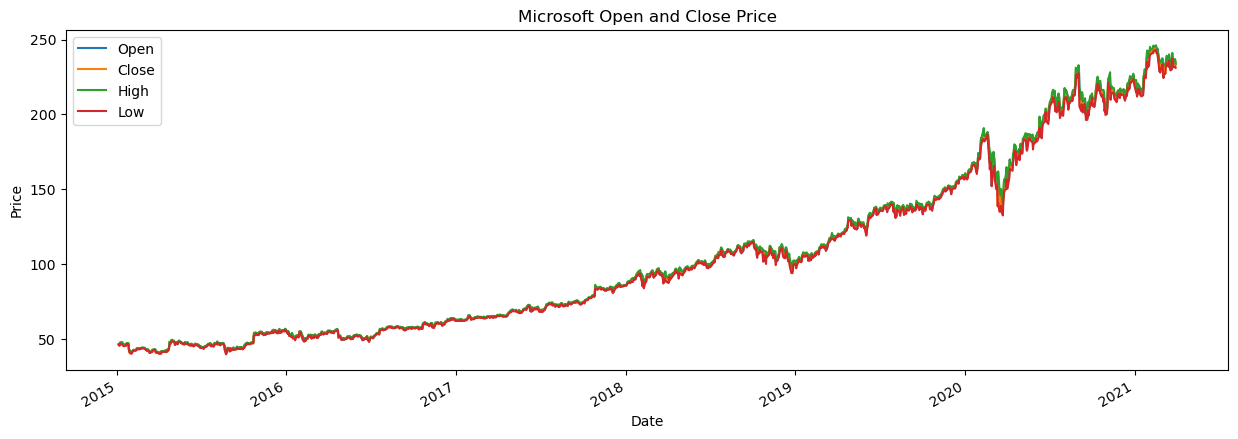

In [13]:
# plot of all year open and close price
def plot_open_close_prices(df):
    df[['Open', 'Close','High','Low']].plot(figsize=(15, 5))
    plt.title('Microsoft Open and Close Price')
    plt.ylabel('Price')
    plt.show()
plot_open_close_prices(df) 

##### Open and Close Prices

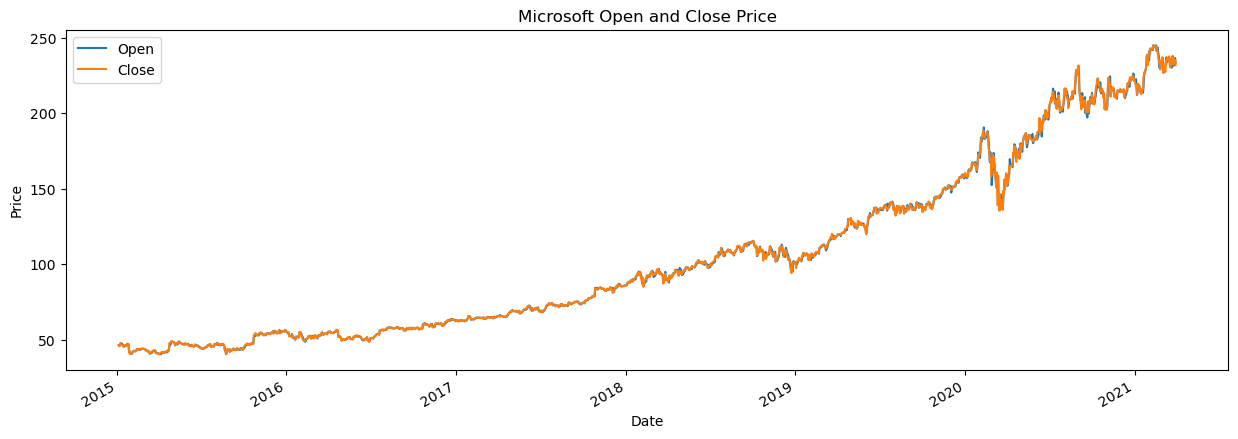

In [14]:
# plot of all year open and close price
def plot_open_close_prices(df):
    df[['Open', 'Close']].plot(figsize=(15, 5))
    plt.title('Microsoft Open and Close Price')
    plt.ylabel('Price')
    plt.show()

plot_open_close_prices(df)    

$Inference$

* The stock price of Microsoft has been increasing over the years.

#### High and Low Prices

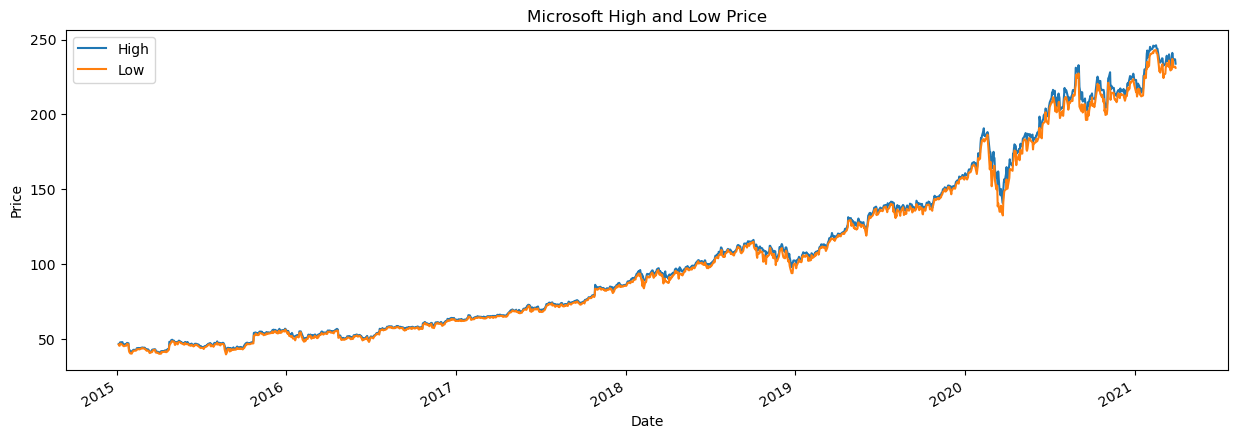

In [15]:
# plot of all year high and low price
def plot_high_low_prices(df):
    df[['High', 'Low']].plot(figsize=(15, 5))
    plt.title('Microsoft High and Low Price')
    plt.ylabel('Price')
    plt.show()
    
plot_high_low_prices(df)


#### Volume of Microsoft Stock Per Year

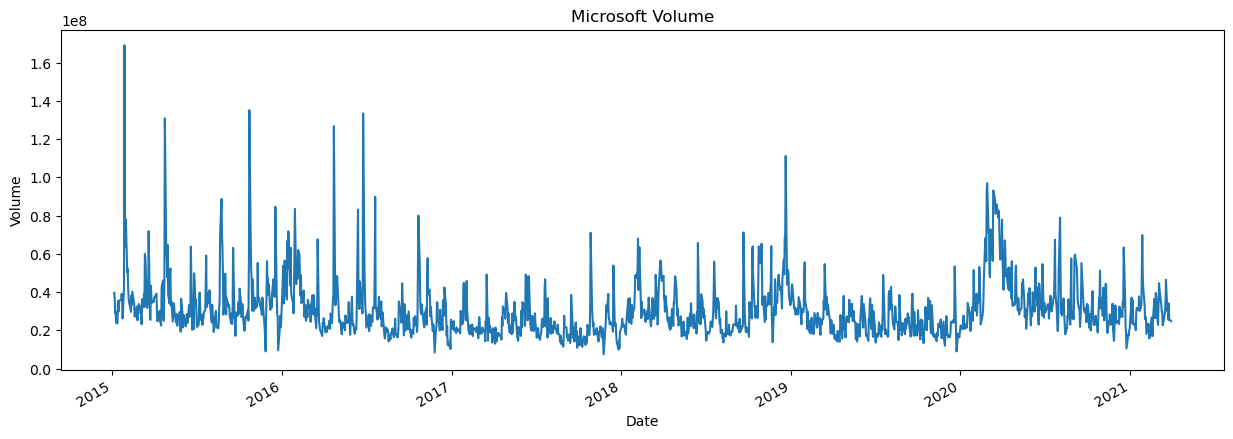

In [16]:
# plot of all year volume
def plot_volume(datasetLogDiffShifting):
    df['Volume'].plot(figsize=(15, 5))
    plt.title('Microsoft Volume')
    plt.ylabel('Volume')
    plt.show()
plot_volume(df)    

#### Distribution of Microsoft Stock Prices

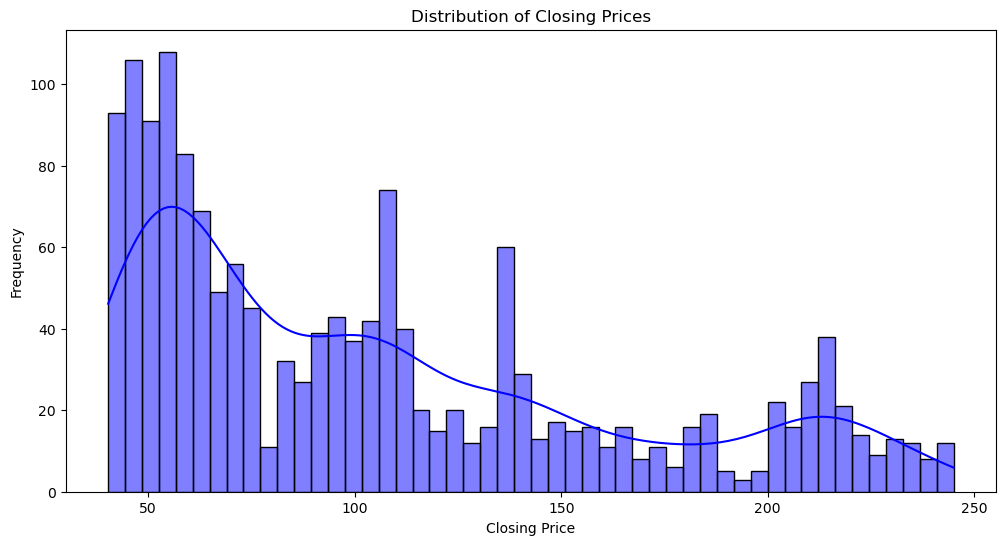

In [17]:
def plot_closing_price_distribution(df):
    plt.figure(figsize=(12, 6))
    sns.histplot(df['Close'], kde=True, bins=50, color='blue')
    
    plt.title('Distribution of Closing Prices')
    plt.xlabel('Closing Price')
    plt.ylabel('Frequency')
    plt.show()

plot_closing_price_distribution(df)


$Inference$
* The distribution of Microsoft stock prices is positively skewed, with a long tail on the right side.
* The prices are concentrated between 0 and 100, with a few outliers above 100.

In [18]:
weekly_analysis = df.resample('W').agg({'Close':'mean','High':'max','Low':'min','Volume':'sum'})
weekly_analysis.head()

,Close,High,Low,Volume
Date,,,,
2015-01-11,46.598000,47.820000,45.490002,158825300
2015-01-18,46.128000,47.910000,45.169998,157088200
2015-01-25,46.655000,47.389999,45.480000,137352600
2015-02-01,42.653999,47.130001,40.349998,437786800
2015-02-08,41.916000,42.790001,40.230000,215214500


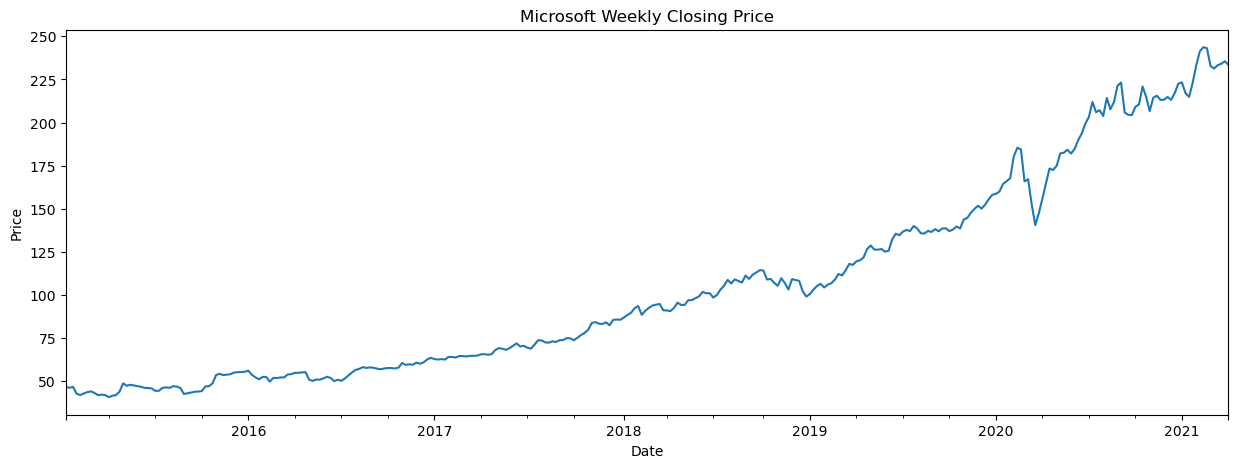

In [19]:
# plot of weekly closing price Downsampled to weekly frequency

def plot_weekly_closing_price(weekly_analysis):
    weekly_analysis['Close'].plot(figsize=(15, 5))
    plt.title('Microsoft Weekly Closing Price')
    plt.ylabel('Price')
    plt.show()

plot_weekly_closing_price(weekly_analysis)

#### Daily Price Change 

In [20]:
# Calculate Daily Returns

df['Price_change'] = df['Close'] - df['Open']

# 1 Day Percent Change
df['Percent_return'] = ((df['Price_change']) / df['Close']) * 100

df.head()


,Open,High,Low,Close,Adj Close,Volume,Price_change,Percent_return
Date,,,,,,,,
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.247128,39673900,-0.039997,-0.086331
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.656399,36447900,-0.730000,-1.599123
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.160263,29114100,0.250000,0.540774
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.341694,29645200,0.840000,1.765077
2015-01-09,47.610001,47.820000,46.900002,47.189999,40.994213,23944200,-0.420002,-0.890023


In [21]:
df['Price_change'] = df['Close'] - df['Open']
df.head()      
df['percent_return'] = ((df['Price_change']) / df['Close']) * 100       
fig = px.line(df, x=df.index, y="percent_return", title='Percent Return')
fig.show()

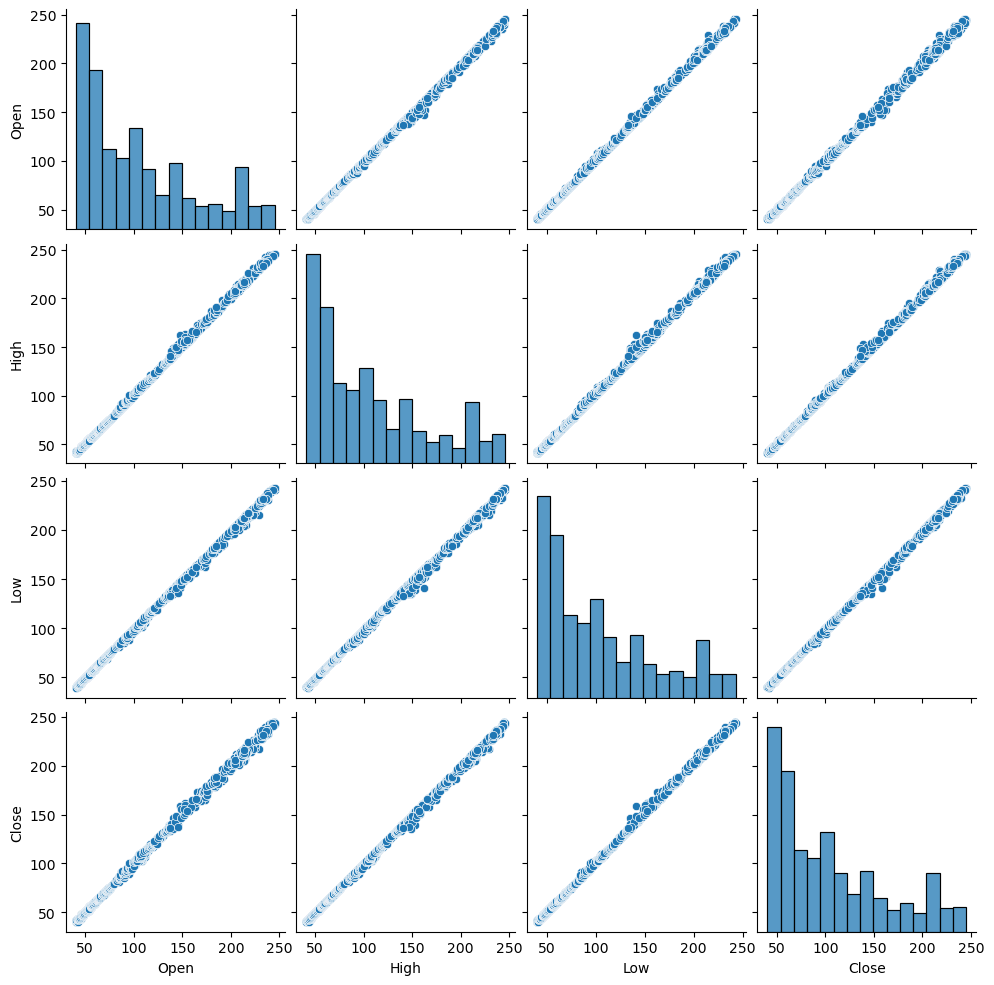

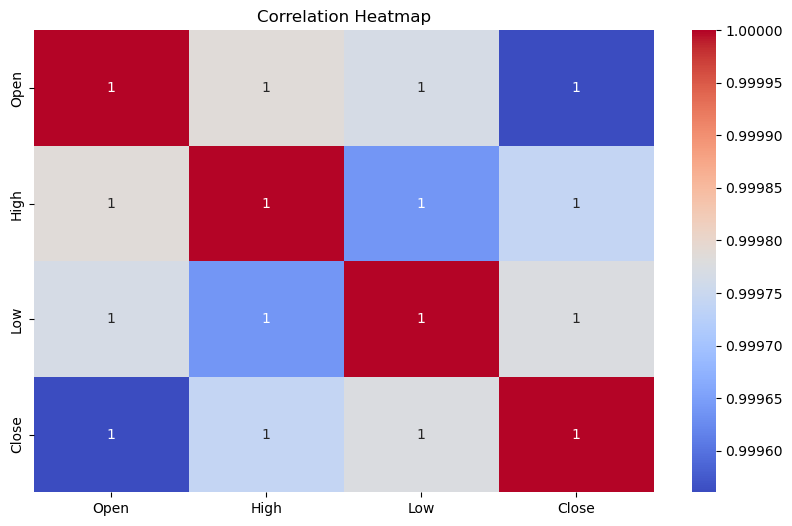

In [22]:
def plot_pairplot(df, columns):
    sns.pairplot(df[columns])
    plt.show()

def plot_correlation_heatmap(df, columns):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Specify the columns for pair plot and correlation heatmap
columns_for_pairplot = ['Open', 'High', 'Low', 'Close']
columns_for_heatmap = ['Open', 'High', 'Low', 'Close']

# Call the functions to generate the visualizations
plot_pairplot(df, columns_for_pairplot)
plot_correlation_heatmap(df, columns_for_heatmap)    


# Checking for Stationarity 

In [23]:
# Checking for Stationarity

rolmean = df['Close'].rolling(window=12).mean()
rolstd = df['Close'].rolling(window=12).std()

print(rolmean, rolstd)

Date
2015-01-05           NaN
2015-01-06           NaN
2015-01-07           NaN
2015-01-08           NaN
2015-01-09           NaN
                 ...    
2021-03-24    234.895002
2021-03-25    234.775002
2021-03-26    235.113335
2021-03-29    234.955835
2021-03-30    234.630835
Name: Close, Length: 1570, dtype: float64 Date
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
                ...   
2021-03-24    2.566262
2021-03-25    2.655265
2021-03-26    2.585661
2021-03-29    2.508050
2021-03-30    2.644745
Name: Close, Length: 1570, dtype: float64


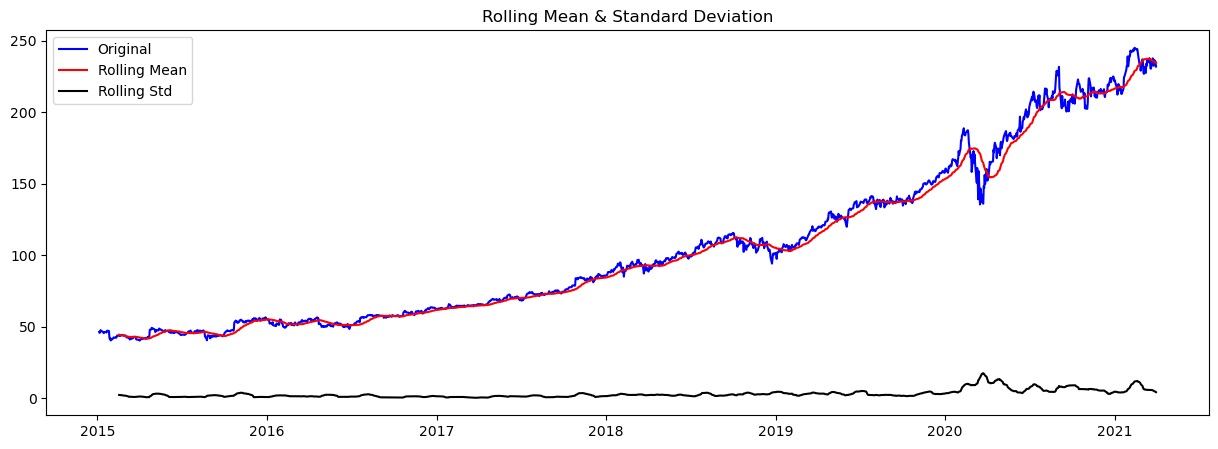

In [24]:
# Plot rolling statistics:
def plot_rolling_statistics(df, window):
    plt.figure(figsize=(15, 5))
    orig = plt.plot(df['Close'], color='blue', label='Original')
    rolmean = df['Close'].rolling(window=window).mean()
    rolstd = df['Close'].rolling(window=window).std()
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

# Define the window size for rolling calculations
window_size = 30

# Call the function to plot rolling statistics
plot_rolling_statistics(df, window_size)

In [25]:
# Perform Dickey-Fuller test:

print('Results of Dickey-Fuller Test:')

dftest = adfuller(df['Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
print(dfoutput)


Results of Dickey-Fuller Test:
Test Statistic                    1.767001
p-value                           0.998281
#Lags Used                       24.000000
Number of Observations Used    1545.000000
Critical Value (1%)              -3.434590
Critical Value (5%)              -2.863413
Critical Value (10%)             -2.567767
dtype: float64


### Log Transformation of the Target Variable $Close$

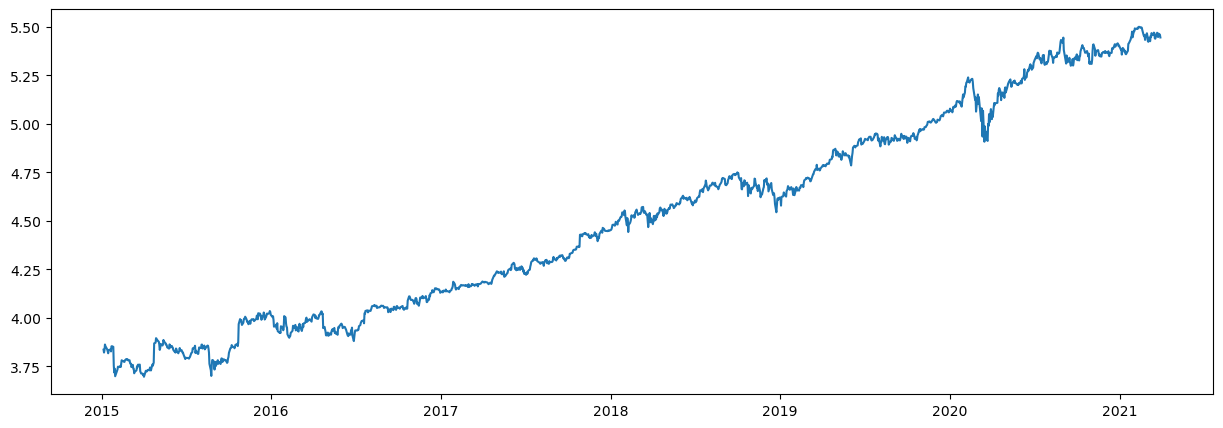

In [26]:
# Plot the log scale of the closing price   
plt.figure(figsize=(15, 5))

df_logScale = np.log(df['Close'])
plt.plot(df_logScale)

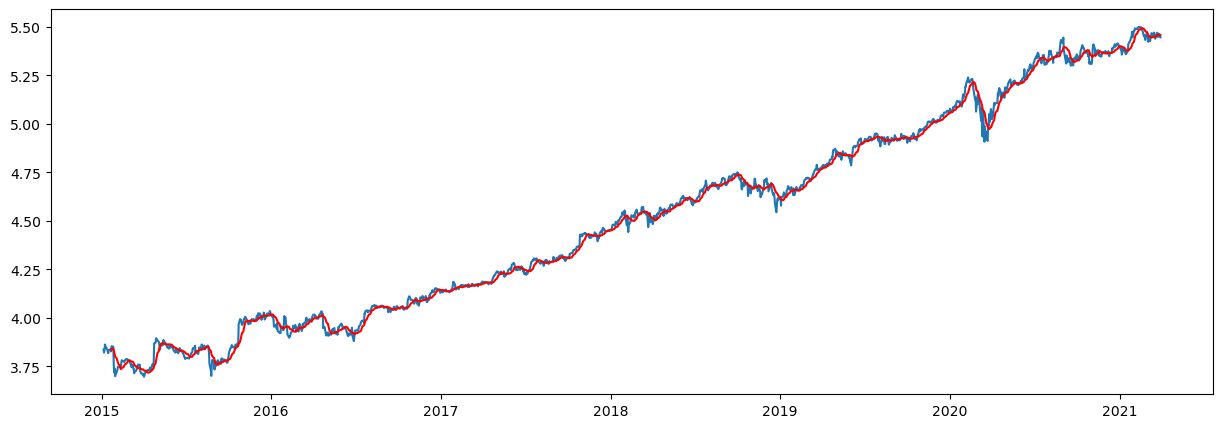

In [27]:
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.figure(figsize=(15, 5))
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')
plt.show()

### Difference of the Log Transformed Target Variable $Close$

In [28]:
# Get the difference between the moving average and the actual closing price
datasetLogScaleMinusMovingAverage = df_logScale - movingAverage
datasetLogScaleMinusMovingAverage

# Remove the NaN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

Date
2015-01-21   -0.008777
2015-01-22    0.015805
2015-01-23    0.014118
2015-01-26    0.009114
2015-01-27   -0.078871
                ...   
2021-03-24    0.002457
2021-03-25   -0.010367
2021-03-26    0.005852
2021-03-29    0.001261
2021-03-30   -0.011864
Name: Close, Length: 1559, dtype: float64

In [29]:
# Checking for Stationarity

def test_stationarity(timeseries):
        #Determing rolling statistics
        movingAverage = timeseries.rolling(window=12).mean()
        movingSTD = timeseries.rolling(window=12).std()
    
        #Plot rolling statistics:
        plt.figure(figsize=(15, 5))
        orig = plt.plot(timeseries, color='blue', label='Original')
        mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
        std = plt.plot(movingSTD, color='black', label='Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
        plt.show(block=False)
        
        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
        for key, value in dftest[4].items():
            dfoutput['Critical Value (%s)' %key] = value
        print(dfoutput)

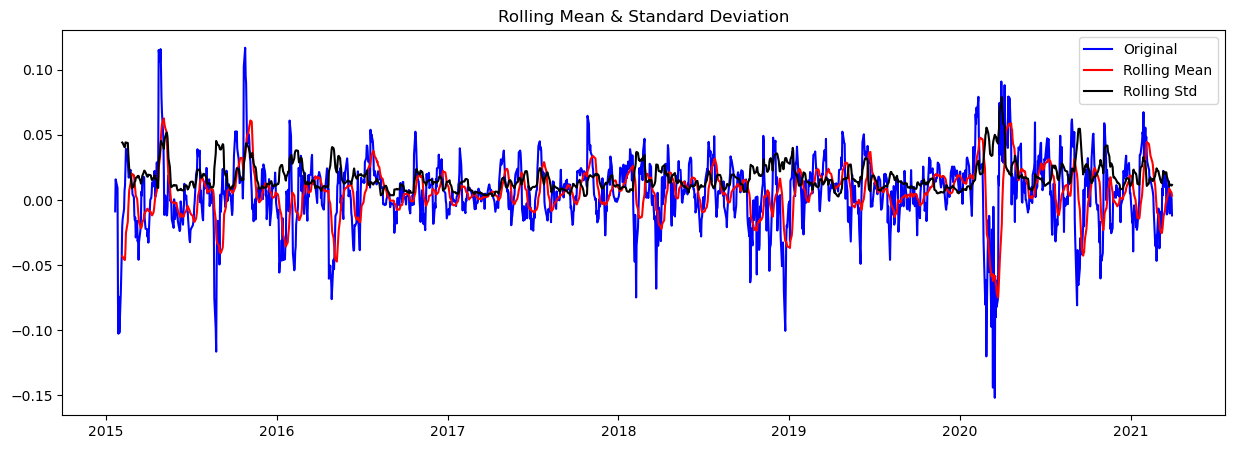

Results of Dickey-Fuller Test:
Test Statistic                -9.545437e+00
p-value                        2.657087e-16
#Lags Used                     1.800000e+01
Number of Observations Used    1.540000e+03
Critical Value (1%)           -3.434603e+00
Critical Value (5%)           -2.863419e+00
Critical Value (10%)          -2.567770e+00
dtype: float64


In [30]:
# Test the stationarity of the data
test_stationarity(datasetLogScaleMinusMovingAverage)

$Inference$
* The test statistic is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is ```-13.47539```, which is significantly lower than the critical values at all confidence levels ```(1%, 5%, and 10%)```. This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is the probability of observing the test statistic or a more extreme value under the null hypothesis. In this case, the p-value is very small ```(3.319963e-25)```, which is significantly below common significance levels like ```0.05``` or ```0.01```. This further supports the rejection of the null hypothesis and indicates that the time series is stationary.

* The number of lags used is ```14```, which represents the number of lagged differences included in the regression. This value is determined automatically by the test based on maximizing certain criteria.

* The number of observations used is ```3361```, indicating the total number of data points used in the analysis.

* The critical values represent the threshold values at which the test statistic must be below in order to reject the null hypothesis. The critical values at different confidence levels ```(1%, 5%, and 10%)``` are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

Based on these results, it appears that the time series you tested is ```stationary```, as both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity.

### Exponential Smoothing

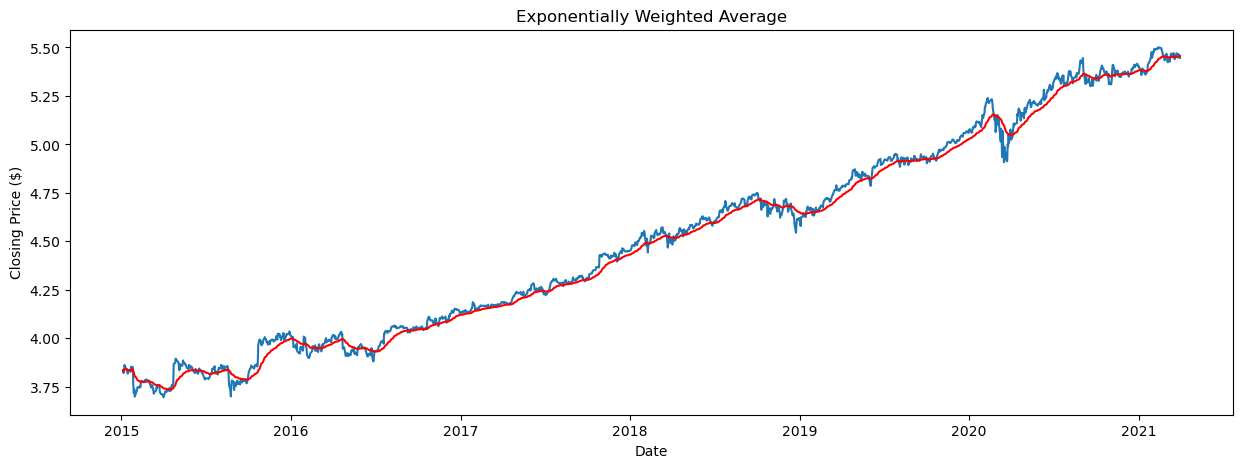

In [31]:
# Get the exponentially weighted moving average
plt.figure(figsize=(15, 5))

exponentialDecayWeightedAverage = df_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

plt.title('Exponentially Weighted Average')
plt.ylabel('Closing Price ($)')
plt.xlabel('Date') 

plt.show()

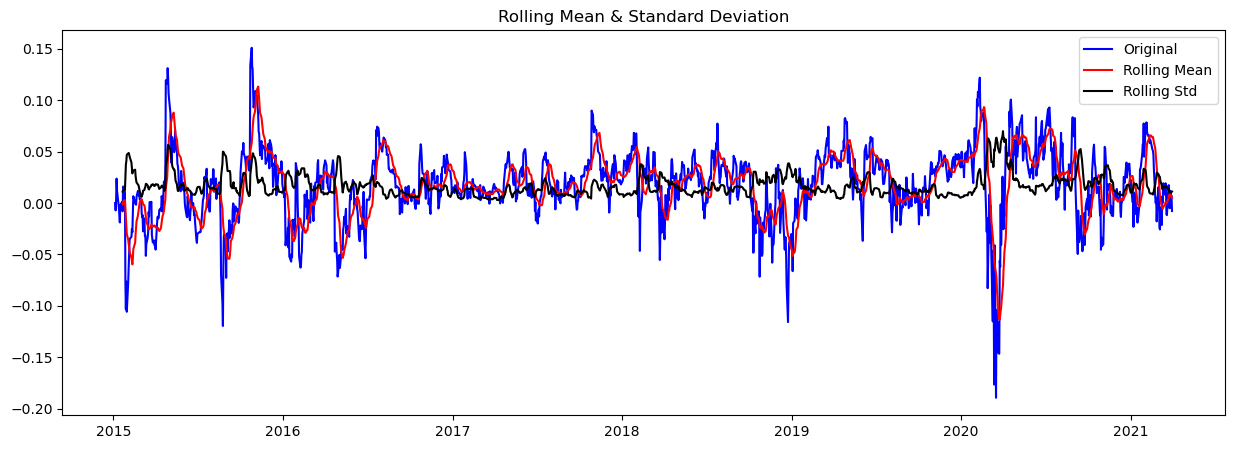

Results of Dickey-Fuller Test:
Test Statistic                -7.384229e+00
p-value                        8.318021e-11
#Lags Used                     9.000000e+00
Number of Observations Used    1.560000e+03
Critical Value (1%)           -3.434549e+00
Critical Value (5%)           -2.863395e+00
Critical Value (10%)          -2.567757e+00
dtype: float64


In [32]:
# Getting the difference between the exponentially weighted moving average and the actual closing price
datasetLogScaleMinusMovingExponentialDecayAverage = df_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

$Inference$

* The test statistic is -9.416397e+00. It is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is significantly lower than the critical values at all confidence levels (1%, 5%, and 10%). This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is 5.654121e-16, which is very small. The p-value represents the probability of observing the test statistic or a more extreme value under the null hypothesis. A small p-value suggests strong evidence against the null hypothesis, supporting the conclusion that the time series is stationary.

* The number of lags used is 9, indicating the number of lagged differences included in the regression. This value is determined automatically by the test based on certain criteria.

* The number of observations used is 3,377, representing the total number of data points used in the analysis.

* The critical values represent threshold values at which the test statistic must be below to reject the null hypothesis. The critical values at different confidence levels (1%, 5%, and 10%) are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

* Based on these results, it appears that the time series you tested is stationary. Both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity, supporting the conclusion of stationarity.

### Shifting 

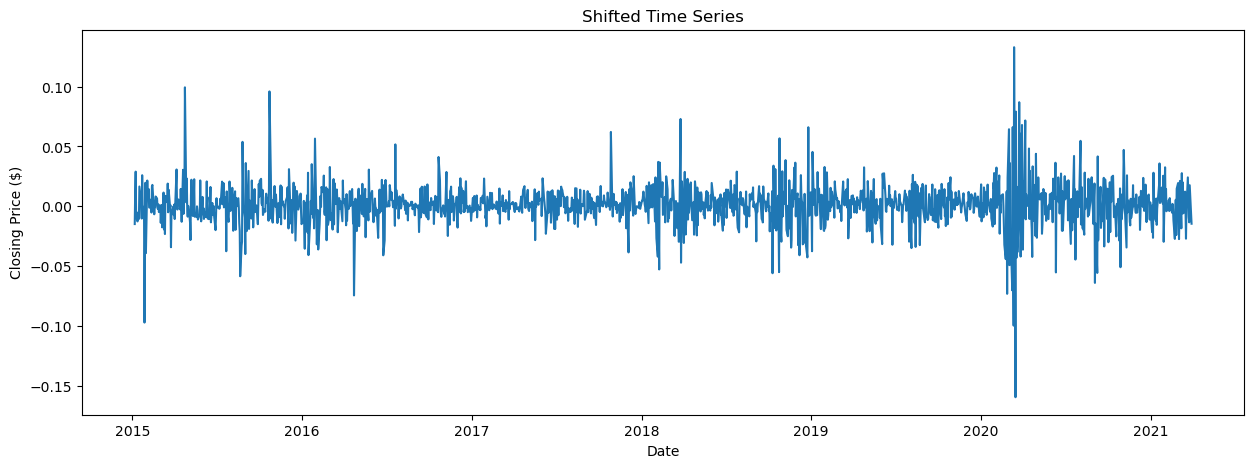

In [33]:
# Shift the data by 1 to make it stationary
plt.figure(figsize=(15, 5))

datasetLogDiffShifting = df_logScale - df_logScale.shift()

plt.plot(datasetLogDiffShifting)
plt.ylabel('Closing Price ($)')
plt.xlabel('Date')
plt.title('Shifted Time Series')

plt.show()

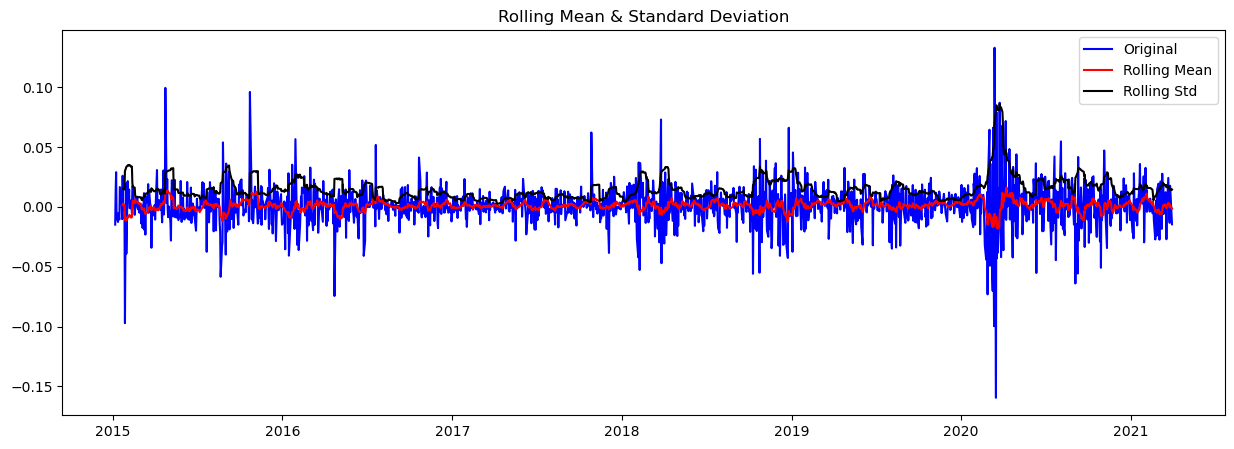

Results of Dickey-Fuller Test:
Test Statistic                -1.404611e+01
p-value                        3.238587e-26
#Lags Used                     8.000000e+00
Number of Observations Used    1.560000e+03
Critical Value (1%)           -3.434549e+00
Critical Value (5%)           -2.863395e+00
Critical Value (10%)          -2.567757e+00
dtype: float64


In [34]:
# Removing the NaN values
datasetLogDiffShifting.dropna(inplace=True)

# Test the stationarity of the data
test_stationarity(datasetLogDiffShifting)

$Inference$

* The test statistic is ```-20.709984```. It is a measure of how strongly the data rejects the null hypothesis of non-stationarity. In this case, the test statistic is significantly lower than the critical values at all confidence levels ```(1%, 5%, and 10%)```. This suggests strong evidence against the null hypothesis of non-stationarity, indicating that the time series is likely stationary.

* The p-value is ```0.000000```, which is very small. The p-value represents the probability of observing the test statistic or a more extreme value under the null hypothesis. A small p-value suggests strong evidence against the null hypothesis, supporting the conclusion that the time series is stationary.

* The number of lags used is ```8```, indicating the number of lagged differences included in the regression. This value is determined automatically by the test based on certain criteria.

* The number of observations used is ```3,377```, representing the total number of data points used in the analysis.

* The critical values represent threshold values at which the test statistic must be below to reject the null hypothesis. The critical values at different confidence levels ```(1%, 5%, and 10%)``` are compared to the test statistic. If the test statistic is lower than these critical values, the null hypothesis is rejected.

* Based on these results, it is evident that the time series you tested is stationary. Both the test statistic and the p-value provide strong evidence against the null hypothesis of non-stationarity, supporting the conclusion of stationarity.

### Autocorrelation Analysis 

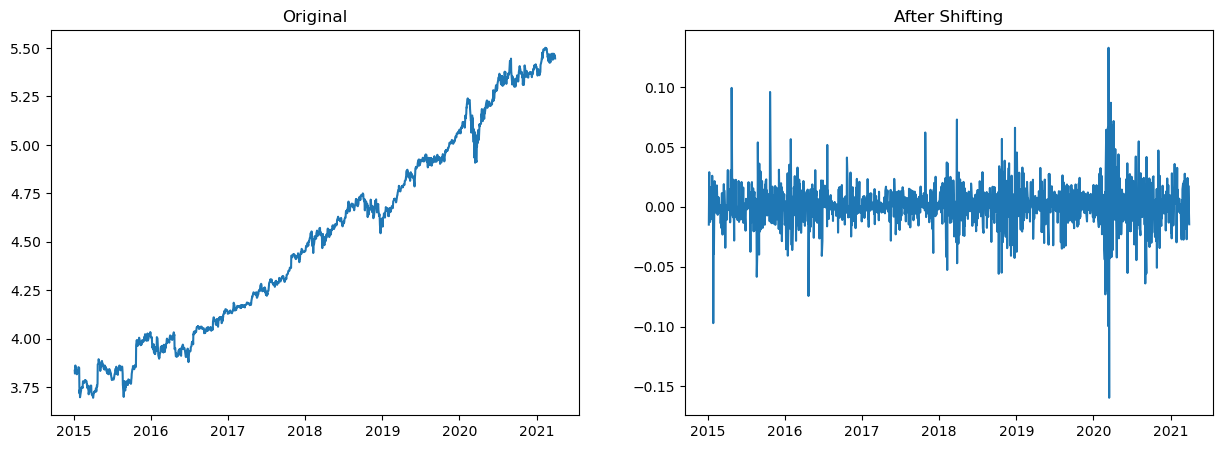

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(df_logScale)
ax1.set_title('Original')
ax2.plot(datasetLogDiffShifting)
ax2.set_title('After Shifting')

plt.show()


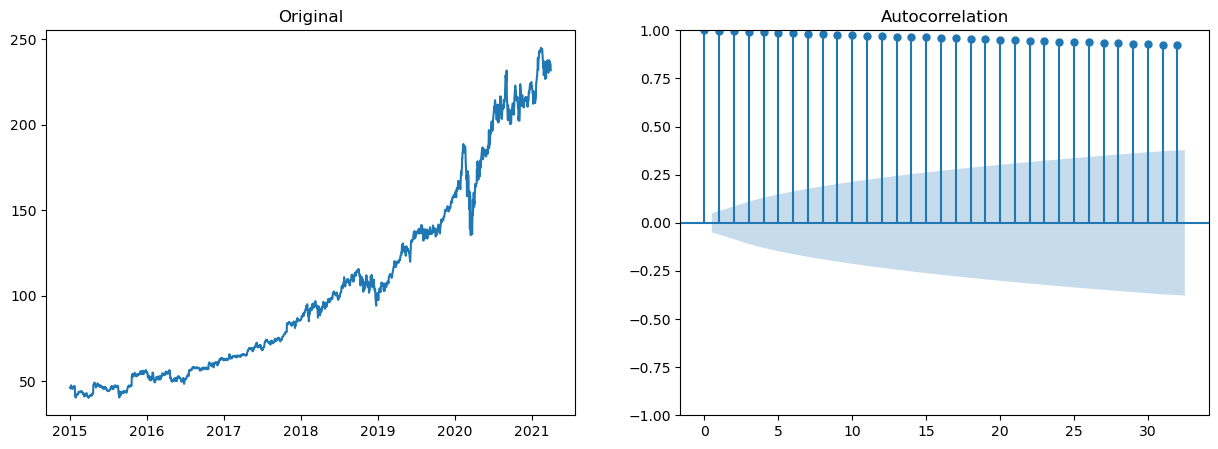

In [36]:
# IMport plot_acf and plot_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF and PACF plots:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

### Differencing 

In [37]:
from pmdarima.arima.utils import ndiffs

ndf = ndiffs(df.Close, test='adf')

print(f'Estimated differencing term: {ndf}')

Estimated differencing term: 1


### Moving Average (q) ACF

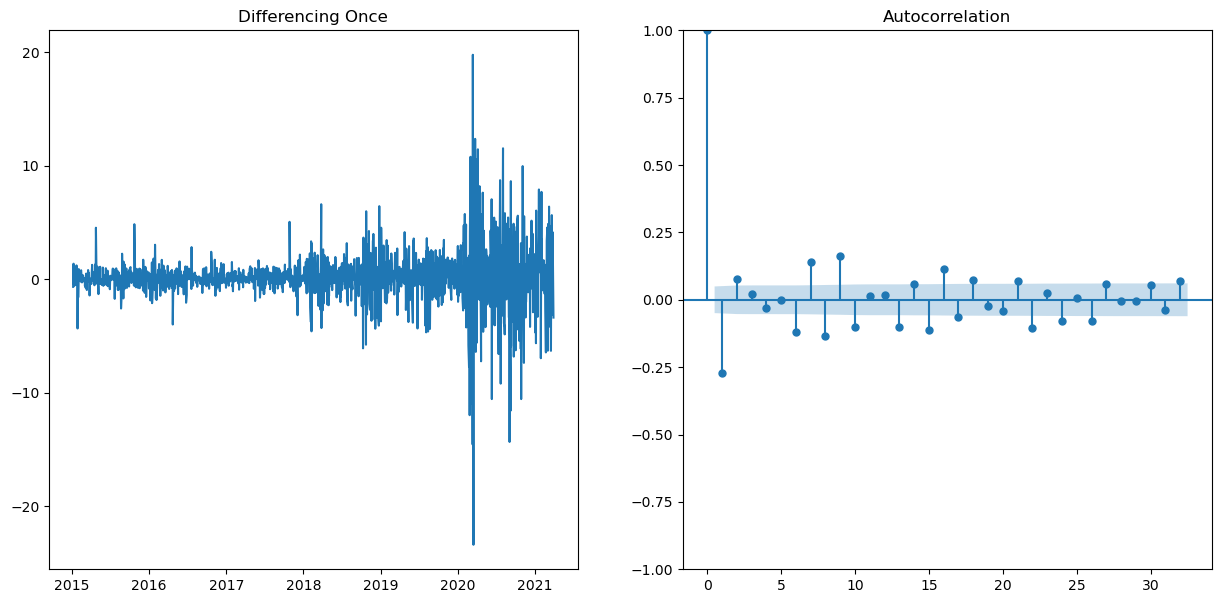

In [38]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.plot(diff)
ax1.set_title('Differencing Once')
plot_acf(diff, ax=ax2);

$Inference$

* The ACF plot shows a significant spike at lag 1, followed by a gradual decline in the autocorrelation coefficients. This suggests that the time series is likely an ```AR(1)``` process.

### Auto Regressive (p) PACF

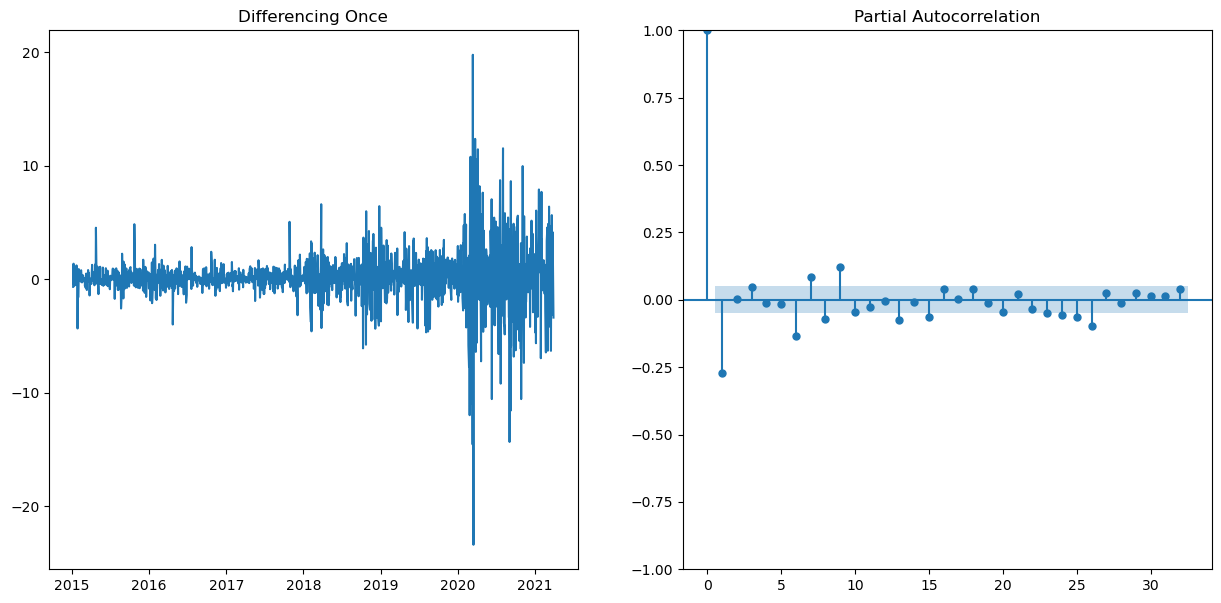

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

ax1.plot(diff)
ax1.set_title('Differencing Once')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);


$Inference$

* The PACF plot shows a significant spike at lag 1, followed by a gradual decline in the partial autocorrelation coefficients. This suggests that the time series is likely an ```MA(1)``` process.

#### Fitting the ARIMA Model

RMSE: 49.96


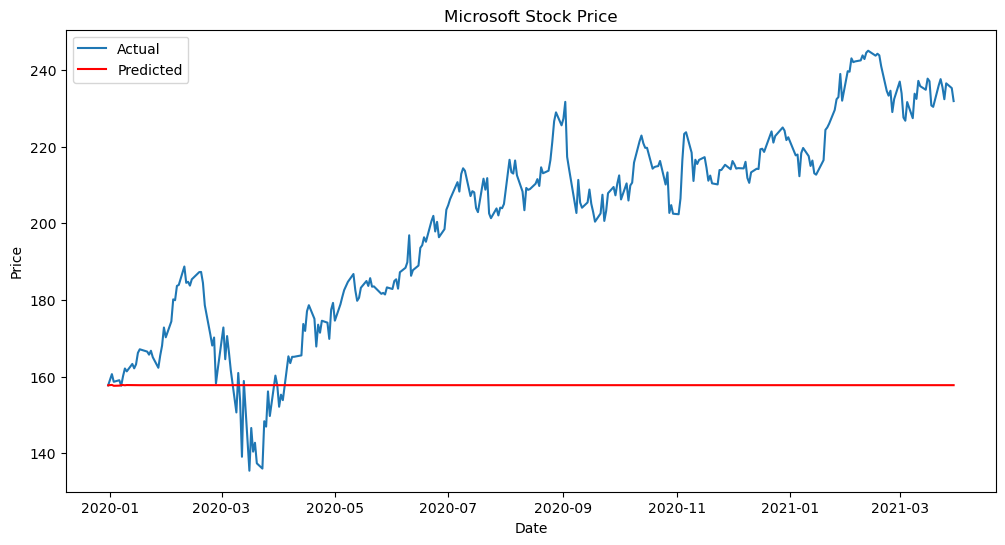

In [40]:
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Training the model with the optimal p, d, and q values
# You may need to modify the order based on the autocorrelation and partial autocorrelation plots
model = ARIMA(train['Close'], order=(6, 1, 1))
model_fit = model.fit()

# Making predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
# Evaluating the model
mse = mean_squared_error(test['Close'], predictions)
rmse = np.sqrt(mse)
print('RMSE: %.2f' % rmse)

# Visualizing the predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='r')
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df.Close, order=(6, 1, 1))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1570
Model:                 ARIMA(6, 1, 1)   Log Likelihood               -3456.246
Date:                Tue, 20 Jun 2023   AIC                           6928.492
Time:                        16:35:37   BIC                           6971.358
Sample:                             0   HQIC                          6944.425
                               - 1570                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9094      0.043    -20.949      0.000      -0.994      -0.824
ar.L2         -0.1498      0.021     -6.989      0.000      -0.192      -0.108
ar.L3          0.0706      0.019      3.776      0.0

(array([3.97338217e-04, 2.88070208e-03, 1.28737582e-01, 2.28469475e-02,
        9.93345544e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 9.93345544e-05]),
 array([-17.7909558 , -11.37886004,  -4.96676428,   1.44533149,
          7.85742725,  14.26952301,  20.68161878,  27.09371454,
         33.5058103 ,  39.91790607,  46.33000183]),
 <BarContainer object of 10 artists>)

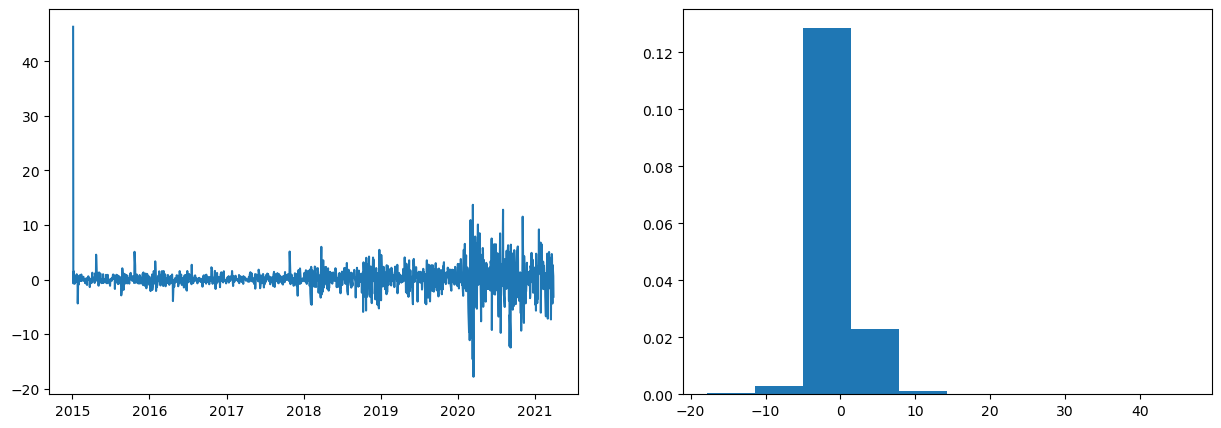

In [42]:
# plot residual errors
residuals = pd.DataFrame(results.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

# MODEL 2 : Facebook Prophet

In [43]:
from fbprophet import Prophet
from math import ceil

def fb_prophet_prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.reset_index(inplace=True)
    df_new['Date'] = pd.to_datetime(df_new.Date,format='%Y-%m-%d')
    df_new.index = df_new['Date']
    df_new.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)
    train_set=df_new.iloc[:ceil(shape*0.75)]
    valid_set=df_new.iloc[ceil(shape*0.75):]
    print('-------------------------------------------------------')
    print('-----------STOCK PRICE PREDICTION BY FB PROPHET-----------')
    print('-------------------------------------------------------')
    print('Shape of Training Set',train_set.shape)
    print('Shape of Validation Set',valid_set.shape)
    model = Prophet()
    model.fit(train_set)
    close_prices = model.make_future_dataframe(periods=len(valid_set))
    forecast = model.predict(close_prices)
    forecast_valid = forecast['yhat'][ceil(shape*0.75):]
    rms=np.sqrt(np.mean(np.power((np.array(valid_set['y'])-np.array(forecast_valid)),2)))
    print('RMSE value on validation set:',rms)
    print('-----------------------------------------------------------')
    print('-----------------------------------------------------------')
    valid_set['Predictions'] = forecast_valid.values
    plt.plot(train_set['y'])
    plt.plot(valid_set[['y', 'Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Stock Price Prediction by FB Prophet',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

ModuleNotFoundError: No module named 'fbprophet'

# Model 3 : LSTM Model

2023-06-20 15:21:06.853037: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 15:21:06.858399: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 15:21:06.861002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-06-20 15:21:08.708420: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 15:21:08.715340: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 15:21:08.717838: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

39/39 [==============================] - 10s 33ms/step - loss: 0.0053
Epoch 2/10
39/39 [==============================] - 1s 32ms/step - loss: 1.8745e-04
Epoch 3/10
39/39 [==============================] - 1s 33ms/step - loss: 1.1078e-04
Epoch 4/10
39/39 [==============================] - 1s 34ms/step - loss: 1.1613e-04
Epoch 5/10
39/39 [==============================] - 1s 35ms/step - loss: 1.0844e-04
Epoch 6/10
39/39 [==============================] - 1s 14ms/step - loss: 1.1005e-04
Epoch 7/10
39/39 [==============================] - 1s 14ms/step - loss: 1.0794e-04
Epoch 8/10
39/39 [==============================] - 1s 29ms/step - loss: 1.1419e-04
Epoch 9/10
39/39 [==============================] - 1s 33ms/step - loss: 1.0722e-04
Epoch 10/10
39/39 [==============================] - 1s 33ms/step - loss: 1.0605e-04


2023-06-20 15:21:36.629349: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-20 15:21:36.630968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-20 15:21:36.632317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 0s 9ms/step


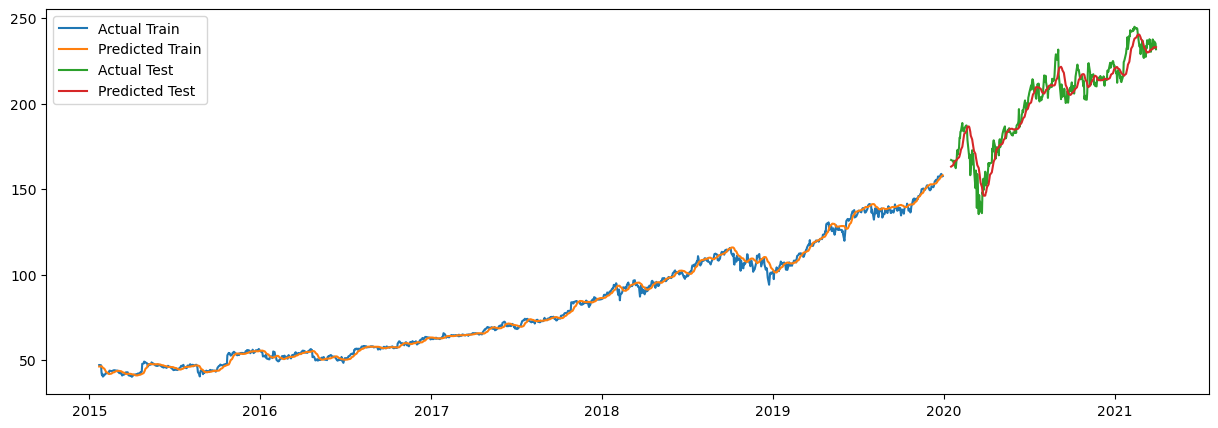

In [ ]:
# Prepare the data
data = df['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)  # 80% for training, 20% for testing
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Create sequences for LSTM training
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 12  # Length of the input sequence for each prediction
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Create and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse scaling to get actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train)
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform(y_test)

# Plot the predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
plt.plot(df.index[seq_length:train_size], y_train, label='Actual Train')
plt.plot(df.index[seq_length:train_size], train_predictions, label='Predicted Train')
plt.plot(df.index[train_size+seq_length:], y_test, label='Actual Test')
plt.plot(df.index[train_size+seq_length:], test_predictions, label='Predicted Test')
plt.legend()
plt.show()


Train MSE: 4.415919323006511
Train RMSE: 2.1014088900084418
Train MAE: 1.4840381107146337
Test MSE: 59.23902767751557
Test RMSE: 7.696689397235383
Test MAE: 5.898274301693141


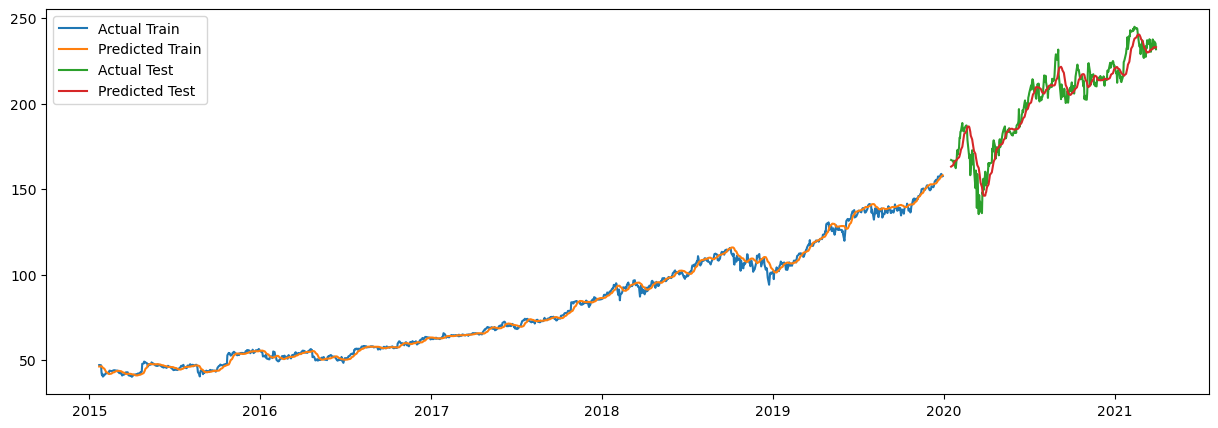

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, train_predictions)

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Train MSE:", train_mse)
print("Train RMSE:", train_rmse)
print("Train MAE:", train_mae)

print("Test MSE:", test_mse)
print("Test RMSE:", test_rmse)
print("Test MAE:", test_mae)

# Plot the predictions against the actual values
plt.figure(figsize=(15, 5))
plt.plot(df.index[seq_length:train_size], y_train, label='Actual Train')
plt.plot(df.index[seq_length:train_size], train_predictions, label='Predicted Train')
plt.plot(df.index[train_size+seq_length:], y_test, label='Actual Test')
plt.plot(df.index[train_size+seq_length:], test_predictions, label='Predicted Test')
plt.legend()
plt.show()
